In [1]:
# ################################################# DATA VISUALIZATION ################################################# 
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

In [3]:
# ################################################# AI RESPONSES #################################################

# make dictionary for matching stakeholders to stakeholder_types
stakeholder_mapping = {
    "Academic_Researchers_on_Great_Salt_Lake": "academics",
    "Agricultural_Sector_in_Utah": "agriculture",
    "Air_Quality_Management_Agencies_in_Utah": "government",
    "Brine_Shrimp_Harvesters": "industry",
    "Environmental_Activists_in_Utah": "environmentalists",
    "Federal_Environmental_Agencies_(e.g.,_EPA)": "government",
    "Fishing_Industry_in_Utah": "industry",
    "Friends_of_Great_Salt_Lake": "environmentalists",
    "Great_Salt_Lake_Advisory_Council": "government",
    "Great_Salt_Lake_Audubon": "environmentalists",
    "Great_Salt_Lake_Institute": "academics",
    "Local_Businesses_in_Salt_Lake_City": "industry",
    "Local_Media_Outlets_in_Salt_Lake_City": "media",
    "Mineral_Extraction_Industry": "industry",
    "Native_American_Tribes_with_Ties_to_Great_Salt_Lake": "native_american_tribes",
    "Outdoor_Recreation_Enthusiasts_in_Utah": "recreation",
    "Public_Health_Officials_in_Utah": "health",
    "Real_Estate_Developers_in_Salt_Lake_City": "industry",
    "Salt_Lake_City_Residents": "residents",
    "Tourism_Industry_in_Utah": "industry",
    "Utah_Department_of_Environmental_Quality": "government",
    "Utah_Department_of_Natural_Resources": "government",
    "Utah_Department_of_Transportation": "government",
    "Utah_Division_of_Water_Resources": "government",
    "Utah_Geological_Survey": "government",
    "Utah_Religious_Communities": "religious_communities",
    "Utah_State_Legislators": "government",
    "Wildlife_Conservation_Organizations_in_Utah": "environmentalists",
    "Young_people_and_youth_groups_in_Utah": "youth"
}

# Define the directory
directory = 'responses/AI/'

# Initialize an empty DataFrame
df = pd.DataFrame()

# Initialize an empty DataFrame with the desired columns
df = pd.DataFrame(columns=["source", "filepath", "content", "stakeholder_type", "values", 
                           "keywords", "methods", "solutions", "facts"])

# Directory containing the AI-generated responses
directory = "responses/AI/"

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        # Construct the full file path
        filepath = os.path.join(directory, filename)
        
        # Read the content of the file
        with open(filepath, 'r') as file:
            content = file.read()
        
        # Split the content into question-answer pairs
        qa_pairs = content.split("# ")[1:]  # Skip the first split result, as it will be empty due to the leading "# "
        qa_dict = {}
        for qa_pair in qa_pairs:
            question, answer = qa_pair.split("\n", 1)  # Split on the first newline to separate the question from the answer
            qa_dict[question] = answer.strip()  # Remove leading/trailing whitespace from the answer
        
        # Extract the stakeholder type from the filename
        stakeholder_type = filename.split("_response.txt")[0].replace('"', '')
        stakeholder_type = stakeholder_mapping.get(stakeholder_type, stakeholder_type)  # Use the mapping if available, otherwise use the original type
        
        # Add a new row to the DataFrame with the 'source' and 'filepath' attributes
        df = df.append({
            "source": "AI",
            "filepath": filepath,
            "content": qa_dict,
            "stakeholder_type": stakeholder_type,
            "values": [],
            "keywords": [],
            "methods": [],
            "solutions": [],
            "facts": []
        }, ignore_index=True)

# Print the DataFrame to check the result

NameError: name 'stakeholder_mapping' is not defined

In [2]:
# use os count the number of files in the responses/AI folder and print # of responses
directory = 'responses/AI/'
num_files = len([f for f in os.listdir(directory)if os.path.isfile(os.path.join(directory, f))])
print(f"Number of AI-generated responses: {num_files}")

Number of AI-generated responses: 29


In [ ]:
# read in all the responses to a dataframe where the index is the filename


In [ ]:
# read in all of the responses in the responses/AI folder to a single string 
responses = "" 
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as file:
            content = file.read()
            responses += content

In [ ]:
# now read in all the 

In [4]:
# read in all the content from the file as a string
with open("data/all_web_content.txt", "r") as file: 
    all_content = file.read()

## Word Mapping

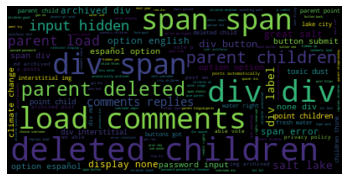

In [6]:

# create a word map from all the words in all the responses 

# remove all non-relevant words
# words to remove: months, ago, permalink, embed, award, give, report, reply, points, month, embed, save
# save these words to list of strings
remove_words = ["months", "ago", "permalink", "embed", "award", "give", "report", "reply", "points", "month", "embed", "save", "load", "comments", "deleted"]
# split the string into a list of words
all_content = all_content.split()
# remove all the words in the remove_words list
all_content = [word for word in all_content if word not in remove_words]
# join the list of words back into a string
all_content = " ".join(all_content)

wordcloud = WordCloud().generate(all_content)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word Plotting

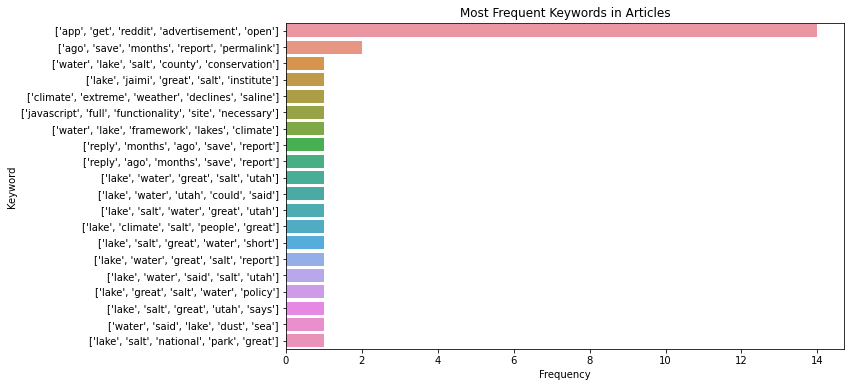

In [4]:
# count the frequency of each keyword in the dataframe
keyword_freq = df['keywords'].explode().value_counts()

# Plot the top 20 keywords as a bar chart 
plt.figure(figsize=(10, 6)) 
sns.barplot(x=keyword_freq[:20], y=keyword_freq[:20].index) 
plt.xlabel('Frequency') 
plt.ylabel('Keyword') 
plt.title('Most Frequent Keywords in Articles') 
plt.show()


## Sentiment Analysis

In [5]:
# A sentiment analysis of the content of each article
def get_sentiment(text): 
    # Create a TextBlob object from the text blob = TextBlob(text) 
    # # Return the polarity and subjectivity as a tuple return (blob.sentiment.polarity, blob.sentiment.subjectivity)
    
# Apply the function to each row of the dataframe and assign the results to two new columns
df[['polarity', 'subjectivity']] = df['content'].apply(get_sentiment).apply(pd.Series)

# Plot the polarity and subjectivity of each article as a scatter plot
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='polarity', y='subjectivity', data=df) 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.title('Sentiment Analysis of Articles') 

IndentationError: expected an indented block (567361384.py, line 7)